In [47]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# 采用信息增益的方式，选择

In [84]:
number = 1000

files = ['./data/LGG/miRNA_gene_mean.csv.gz',
         './data/LGG/met.csv.gz',
         './data/LGG/rna.csv.gz'
        ]

gene_names = []

for f in files:
    df = pd.read_csv(f, compression='gzip')
    df = df.set_index('gene')
    df = df.T
    df = df.sort_index()
    df = df.fillna(0)
    
    df_label = pd.read_csv('./data/LGG/label.csv')
    df_label = df_label[df_label.patient_id.isin(df.index.values)]
    df_label = df_label.sort_values('patient_id')
    
    Y = df_label.label.values
    X = df.values
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, shuffle=True, random_state=42)
    select = RFE(estimator=DecisionTreeClassifier(random_state=42, criterion='entropy'),
                n_features_to_select=number,
                 step=0.1
                )
    select.fit(X_train, Y_train)
    
    gene_names += list(df.columns.values[select.get_support()])
    
gene_names = list(set(gene_names))
print(len(gene_names))

1991


In [85]:
with open('./choose_genes.txt', 'w') as F:
    for g in gene_names:
        F.writelines(str(g) + '\n')

In [58]:
df = pd.read_csv(f, compression='gzip')
df

,gene,TCGA.DH.5140,TCGA.WH.A86K,TCGA.HT.7680,TCGA.DU.8167,TCGA.HT.A5R7,TCGA.DH.A66D,TCGA.S9.A89Z,TCGA.HT.8108,TCGA.TQ.A7RJ,...,TCGA.DU.7013,TCGA.S9.A7J0,TCGA.CS.5394,TCGA.DU.8158,TCGA.DB.A4XH,TCGA.HT.7476,TCGA.HT.A618,TCGA.FG.6688,TCGA.IK.8125,TCGA.E1.5303
0,1,4.6185,8.4603,5.4552,6.6581,6.8002,6.4365,8.0893,6.3700,6.7667,...,6.2321,6.4978,5.2841,7.7914,5.2038,7.1097,6.2298,6.9476,4.4547,7.6851
1,2,13.1572,13.6312,13.2631,14.1168,12.3281,13.9431,14.5515,14.2039,13.9256,...,14.4289,12.6983,13.1704,13.6110,13.4455,13.8181,14.5908,14.1095,13.3998,14.7338
2,9,4.4636,3.7677,6.4637,4.2737,4.1503,4.4485,4.9385,4.2456,3.9215,...,4.4325,3.7845,4.0347,6.2305,3.8326,4.7321,5.6909,4.5803,4.9940,4.9290
3,10,1.9695,5.1641,3.5389,3.7103,3.6427,3.8962,4.1495,2.4574,1.9646,...,2.8190,1.8302,0.4164,4.3018,2.2821,2.8456,4.9592,4.2286,3.2694,1.2922
4,12,11.5545,10.8544,15.2290,11.4204,11.8490,12.1177,13.7084,7.8878,10.1531,...,13.5314,9.6520,8.1225,14.2695,7.3364,9.3089,13.8528,15.8244,10.0658,14.5375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17041,101340250,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.4928,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
17042,102723547,1.4405,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
17043,102724473,0.0000,0.6790,1.0964,0.0000,0.9690,0.0000,0.9686,0.0000,0.4467,...,0.3130,1.3771,0.0000,0.6181,0.0000,0.0000,0.5635,1.3097,0.0000,0.0000
17044,105375355,1.3897,1.1387,0.4640,2.2485,2.1214,1.1093,2.5322,2.8805,3.8865,...,1.7752,3.6440,0.7391,2.4717,1.6816,1.6148,1.5418,2.4427,1.1601,0.9753


In [71]:
gene_names = []
with open('./choose_genes.txt', 'r') as F:
    for line in F.readlines():
        line = line.strip()
        line = int(line)
        gene_names.append(line)

In [62]:
df[df.gene.isin(gene_names)].reset_index(drop=True)

,gene,TCGA.DH.5140,TCGA.WH.A86K,TCGA.HT.7680,TCGA.DU.8167,TCGA.HT.A5R7,TCGA.DH.A66D,TCGA.S9.A89Z,TCGA.HT.8108,TCGA.TQ.A7RJ,...,TCGA.DU.7013,TCGA.S9.A7J0,TCGA.CS.5394,TCGA.DU.8158,TCGA.DB.A4XH,TCGA.HT.7476,TCGA.HT.A618,TCGA.FG.6688,TCGA.IK.8125,TCGA.E1.5303
0,102,9.8429,9.1911,10.2455,9.8161,9.6713,10.1889,10.2708,10.2623,9.8812,...,10.5754,10.0404,10.5921,9.9099,10.1984,9.7930,10.1122,9.3668,10.3091,10.4239
1,103,12.5968,12.3294,12.5392,12.6085,12.9368,12.9159,12.4516,14.0177,12.4656,...,13.1621,12.5528,13.0011,12.7887,12.4984,12.5565,12.6809,12.6063,12.6655,12.2373
2,104,7.3403,8.1892,7.4367,8.5633,9.7229,8.5897,7.5515,8.2875,8.7781,...,7.7575,8.0123,8.1155,9.0376,8.9088,9.6778,8.2837,8.0477,9.1915,7.7185
3,105,6.7798,6.4617,7.3754,8.1049,8.3342,5.7302,5.7578,6.7508,7.7610,...,5.4556,6.2735,6.3090,4.8081,8.0399,6.5519,6.5428,8.7857,7.5573,9.4259
4,167,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.5635,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,100302736,4.4058,0.0000,5.1067,2.8727,3.9305,2.4231,3.8705,4.0034,0.0000,...,6.2608,0.0000,5.1576,5.7045,0.0000,3.0238,3.8868,4.0132,3.2310,0.0000
936,100506658,4.5258,5.2349,5.2972,6.0811,5.2788,6.2741,5.6926,5.9547,6.4786,...,6.2033,5.4947,6.8297,5.0717,5.8543,6.3108,6.3019,5.5724,5.8296,5.5805
937,100506736,0.7208,1.1387,0.4640,2.2485,2.7538,1.7289,0.5641,1.8562,1.0625,...,3.0476,0.0000,2.0040,4.5024,2.2821,1.4061,2.1195,1.0767,1.7946,0.0000
938,105375355,1.3897,1.1387,0.4640,2.2485,2.1214,1.1093,2.5322,2.8805,3.8865,...,1.7752,3.6440,0.7391,2.4717,1.6816,1.6148,1.5418,2.4427,1.1601,0.9753


In [80]:
files = ['./data/LGG/miRNA_gene_mean.csv.gz',
         './data/LGG/met.csv.gz',
         './data/LGG/rna.csv.gz'
        ]

for f in files:
    df = pd.read_csv(f, compression='gzip')
    df = df[df.gene.isin(gene_names)].reset_index(drop=True)
    df = df.sort_values('gene')
    df.to_csv(f.split('/')[-1], index=False, compression='gzip')

In [75]:
pd.read_csv('./rna.csv.gz', compression='gzip')

,gene,TCGA.DH.5140,TCGA.WH.A86K,TCGA.HT.7680,TCGA.DU.8167,TCGA.HT.A5R7,TCGA.DH.A66D,TCGA.S9.A89Z,TCGA.HT.8108,TCGA.TQ.A7RJ,...,TCGA.DU.7013,TCGA.S9.A7J0,TCGA.CS.5394,TCGA.DU.8158,TCGA.DB.A4XH,TCGA.HT.7476,TCGA.HT.A618,TCGA.FG.6688,TCGA.IK.8125,TCGA.E1.5303
0,102,9.8429,9.1911,10.2455,9.8161,9.6713,10.1889,10.2708,10.2623,9.8812,...,10.5754,10.0404,10.5921,9.9099,10.1984,9.7930,10.1122,9.3668,10.3091,10.4239
1,103,12.5968,12.3294,12.5392,12.6085,12.9368,12.9159,12.4516,14.0177,12.4656,...,13.1621,12.5528,13.0011,12.7887,12.4984,12.5565,12.6809,12.6063,12.6655,12.2373
2,104,7.3403,8.1892,7.4367,8.5633,9.7229,8.5897,7.5515,8.2875,8.7781,...,7.7575,8.0123,8.1155,9.0376,8.9088,9.6778,8.2837,8.0477,9.1915,7.7185
3,105,6.7798,6.4617,7.3754,8.1049,8.3342,5.7302,5.7578,6.7508,7.7610,...,5.4556,6.2735,6.3090,4.8081,8.0399,6.5519,6.5428,8.7857,7.5573,9.4259
4,167,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.5635,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,100302736,4.4058,0.0000,5.1067,2.8727,3.9305,2.4231,3.8705,4.0034,0.0000,...,6.2608,0.0000,5.1576,5.7045,0.0000,3.0238,3.8868,4.0132,3.2310,0.0000
936,100506658,4.5258,5.2349,5.2972,6.0811,5.2788,6.2741,5.6926,5.9547,6.4786,...,6.2033,5.4947,6.8297,5.0717,5.8543,6.3108,6.3019,5.5724,5.8296,5.5805
937,100506736,0.7208,1.1387,0.4640,2.2485,2.7538,1.7289,0.5641,1.8562,1.0625,...,3.0476,0.0000,2.0040,4.5024,2.2821,1.4061,2.1195,1.0767,1.7946,0.0000
938,105375355,1.3897,1.1387,0.4640,2.2485,2.1214,1.1093,2.5322,2.8805,3.8865,...,1.7752,3.6440,0.7391,2.4717,1.6816,1.6148,1.5418,2.4427,1.1601,0.9753


In [76]:
pd.read_csv('./data/LGG/rna.csv.gz', compression='gzip')

,gene,TCGA.DH.5140,TCGA.WH.A86K,TCGA.HT.7680,TCGA.DU.8167,TCGA.HT.A5R7,TCGA.DH.A66D,TCGA.S9.A89Z,TCGA.HT.8108,TCGA.TQ.A7RJ,...,TCGA.DU.7013,TCGA.S9.A7J0,TCGA.CS.5394,TCGA.DU.8158,TCGA.DB.A4XH,TCGA.HT.7476,TCGA.HT.A618,TCGA.FG.6688,TCGA.IK.8125,TCGA.E1.5303
0,1,4.6185,8.4603,5.4552,6.6581,6.8002,6.4365,8.0893,6.3700,6.7667,...,6.2321,6.4978,5.2841,7.7914,5.2038,7.1097,6.2298,6.9476,4.4547,7.6851
1,2,13.1572,13.6312,13.2631,14.1168,12.3281,13.9431,14.5515,14.2039,13.9256,...,14.4289,12.6983,13.1704,13.6110,13.4455,13.8181,14.5908,14.1095,13.3998,14.7338
2,9,4.4636,3.7677,6.4637,4.2737,4.1503,4.4485,4.9385,4.2456,3.9215,...,4.4325,3.7845,4.0347,6.2305,3.8326,4.7321,5.6909,4.5803,4.9940,4.9290
3,10,1.9695,5.1641,3.5389,3.7103,3.6427,3.8962,4.1495,2.4574,1.9646,...,2.8190,1.8302,0.4164,4.3018,2.2821,2.8456,4.9592,4.2286,3.2694,1.2922
4,12,11.5545,10.8544,15.2290,11.4204,11.8490,12.1177,13.7084,7.8878,10.1531,...,13.5314,9.6520,8.1225,14.2695,7.3364,9.3089,13.8528,15.8244,10.0658,14.5375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17041,101340250,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.4928,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
17042,102723547,1.4405,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
17043,102724473,0.0000,0.6790,1.0964,0.0000,0.9690,0.0000,0.9686,0.0000,0.4467,...,0.3130,1.3771,0.0000,0.6181,0.0000,0.0000,0.5635,1.3097,0.0000,0.0000
17044,105375355,1.3897,1.1387,0.4640,2.2485,2.1214,1.1093,2.5322,2.8805,3.8865,...,1.7752,3.6440,0.7391,2.4717,1.6816,1.6148,1.5418,2.4427,1.1601,0.9753


In [92]:
choose_genes = set(gene_names)

In [109]:
df_p = pd.read_csv('./Pathway/Rectome.pathway.csv')
keep_pathways = []
prop = []
for pathway, group in df_p.groupby('pathway'):
    genes = set(group.src.to_list() + group.dest.to_list())
    propotion = len(genes & choose_genes) / len(genes)
    prop.append(propotion)
    if propotion > 0.2:
        keep_pathways.append(pathway)
#     break

print(len(keep_pathways))

208


In [112]:
df_p[df_p.pathway.isin(keep_pathways)]

,src,dest,pathway
120,7099,353376,R-HSA-140534
121,7099,100302736,R-HSA-140534
122,7099,148022,R-HSA-140534
123,7099,23643,R-HSA-140534
124,8797,8837,R-HSA-140534
...,...,...,...
968673,9156,79728,R-HSA-5693554
968674,9156,10635,R-HSA-5693554
968675,9156,5932,R-HSA-5693554
968676,9156,580,R-HSA-5693554


<AxesSubplot:ylabel='Density'>

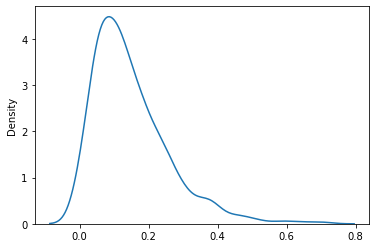

In [103]:
import seaborn as sns

sns.kdeplot(prop)

In [113]:
G

NameError: name 'G' is not defined